# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Cek Type Data & Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
target_col = 'deposit' if 'deposit' in df.columns else 'y'
print(f"\nProporsi Target ('{target_col}')")
print(df[target_col].value_counts())


Proporsi Target ('deposit')
deposit
no     5873
yes    5289
Name: count, dtype: int64


In [7]:
# Cek apakah ada baris yang punya nilai null di kolom manapun
# axis=1 artinya cek per baris (horizontal)
rows_with_nan = df[df.isnull().any(axis=1)]

print(f"Ditemukan {len(rows_with_nan)} baris dengan nilai Null.")

if len(rows_with_nan) > 0:
    print("Berikut adalah contoh datanya:")
    display(rows_with_nan.head())
else:
    print("tidak ada NaN standard.")

Ditemukan 0 baris dengan nilai Null.
tidak ada NaN standard.


In [9]:
# Cek untuk teks "unknown"
unknown_counts = (df == 'unknown').sum()
print("Jumlah nilai 'unknown' per kolom:")
print(unknown_counts[unknown_counts > 0])

Jumlah nilai 'unknown' per kolom:
job            70
education     497
contact      2346
poutcome     8326
dtype: int64


# Data Cleaning & Re-Labeling

In [10]:
df_clean = df.copy()

## Ganti nilai dalam data

Ganti 'unknown' menjadi 'New Customer' di poutcome

In [11]:
df_clean['poutcome'] = df_clean['poutcome'].replace('unknown', 'New Customer')

Ganti 'unknown' menjadi 'Other' di contact

In [12]:
df_clean['contact'] = df_clean['contact'].replace('unknown', 'other')

In [15]:
df_clean[['poutcome','contact']]

,poutcome,contact
0,New Customer,other
1,New Customer,other
2,New Customer,other
3,New Customer,other
4,New Customer,other
...,...,...
11157,New Customer,cellular
11158,New Customer,other
11159,New Customer,cellular
11160,failure,cellular


In [16]:
print(df_clean['poutcome'].value_counts())

poutcome
New Customer    8326
failure         1228
success         1071
other            537
Name: count, dtype: int64


## Handling PDays

masukkan angka -1 mentah-mentah ke matematika, komputer akan mengira -1 (belum pernah dikontak) lebih kecil daripada 1 (baru dikontak kemarin). Padahal maknanya beda total. harus ubah kolom ini nanti. Ubah -1 menjadi angka yang sangat besar (misal: 999) atau buat kolom baru.

In [17]:
# Ganti -1 menjadi 999 (agar dianggap 'sudah lama sekali' atau kategori nasabah baru)
# atau lebih aman kita buat kolom baru penanda
df_clean['pdays'] = df_clean['pdays'].replace(-1, 999)

# EDA

## Peluang Deposito berdasarkan Pekerjaan

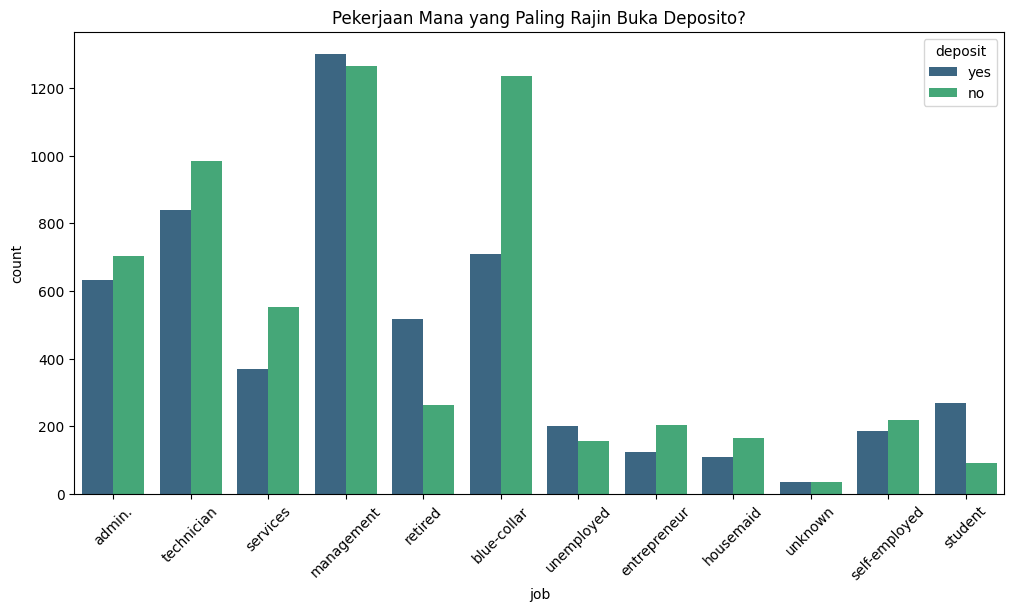

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='job', hue='deposit', palette='viridis')
plt.title('Pekerjaan Mana yang Paling Rajin Buka Deposito?')
plt.xticks(rotation=45)
plt.show()

**Observation**

- Terlihat anomali positif yang mencolok pada dua kelompok ekstrem: Retired (Pensiunan) dan Student (Pelajar).

- Pada batang Retired, jumlah "Yes" (Biru Tua) jauh lebih tinggi daripada "No" (Hijau). Ini adalah satu-satunya kategori pekerjaan di mana pembeli melebihi penolak.

- Sebaliknya, pada Blue-collar (Buruh), batang hijau (No) menjulang tinggi, menandakan tingkat penolakan yang masif.

**Business Insight**

Produk Deposito paling laku di kalangan nasabah yang memiliki likuiditas tunai tinggi dan tanggungan utang rendah. Pensiunan (memiliki uang pesangon) dan Pelajar (menabung untuk masa depan/didukung orang tua) adalah Segmen Premium. Sebaliknya, pekerja kerah biru (Blue-collar) cenderung fokus pada kebutuhan harian, sehingga sulit menyisihkan uang untuk deposito.

**Strategic Recomendation**

- Prioritas Sales: Alokasikan 60% sumber daya telepon untuk menghubungi database Pensiunan dan Pelajar.

- Efisiensi: Kurangi prioritas panggilan ke segmen Blue-collar kecuali mereka memiliki saldo (balance) yang sangat tinggi.

## Peluang Deposito berdasarkan Riwayat Kampanya Sebelumnya

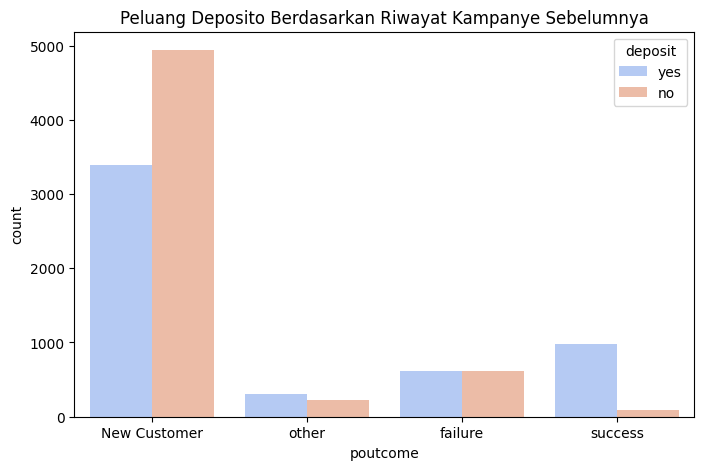

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='poutcome', hue='deposit', palette='coolwarm')
plt.title('Peluang Deposito Berdasarkan Riwayat Kampanye Sebelumnya')
plt.show()

**Observation**

- Pada kategori success (kanan). Batang biru muda (Yes) mendominasi secara mutlak, hampir tidak ada batang oranye (No).

- Pada New Customer (kiri), di mana batang oranye (No) jauh lebih tinggi daripada biru.

**Business Insight**

Sejarah adalah prediktor terbaik masa depan. Nasabah yang pernah membeli produk bank di masa lalu (outcome=success) memiliki tingkat konversi hampir 90%. Mereka sudah percaya pada bank. Sebaliknya, mengakuisisi nasabah baru (New Customer) jauh lebih sulit dan berisiko ditolak.

**Strategic Recomendation**

"Low Hanging Fruit" Strategy, dimana etiap pagi, tim sales wajib menghabiskan daftar nasabah kategori success terlebih dahulu sebelum menghubungi nasabah baru. Ini adalah guaranteed sales.